In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

Import data (Make sure to parse dates. Consider setting index column to 'date'.)

In [32]:
df = pd.read_csv(r'D:\Documents\PASTIME\CODING\Python\freecodecamp\data analysis\fcc-forum-pageviews.csv', index_col=0, parse_dates=True)


Clean data

In [33]:
hi_mask = df['value'] <= df['value'].quantile(0.975)
lo_mask = df['value'] >= df['value'].quantile(0.025)

df = df.loc[hi_mask & lo_mask]
df.head()

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325


Draw line plot

Save image and return fig (don't change this part)

Figure(5000x2000)


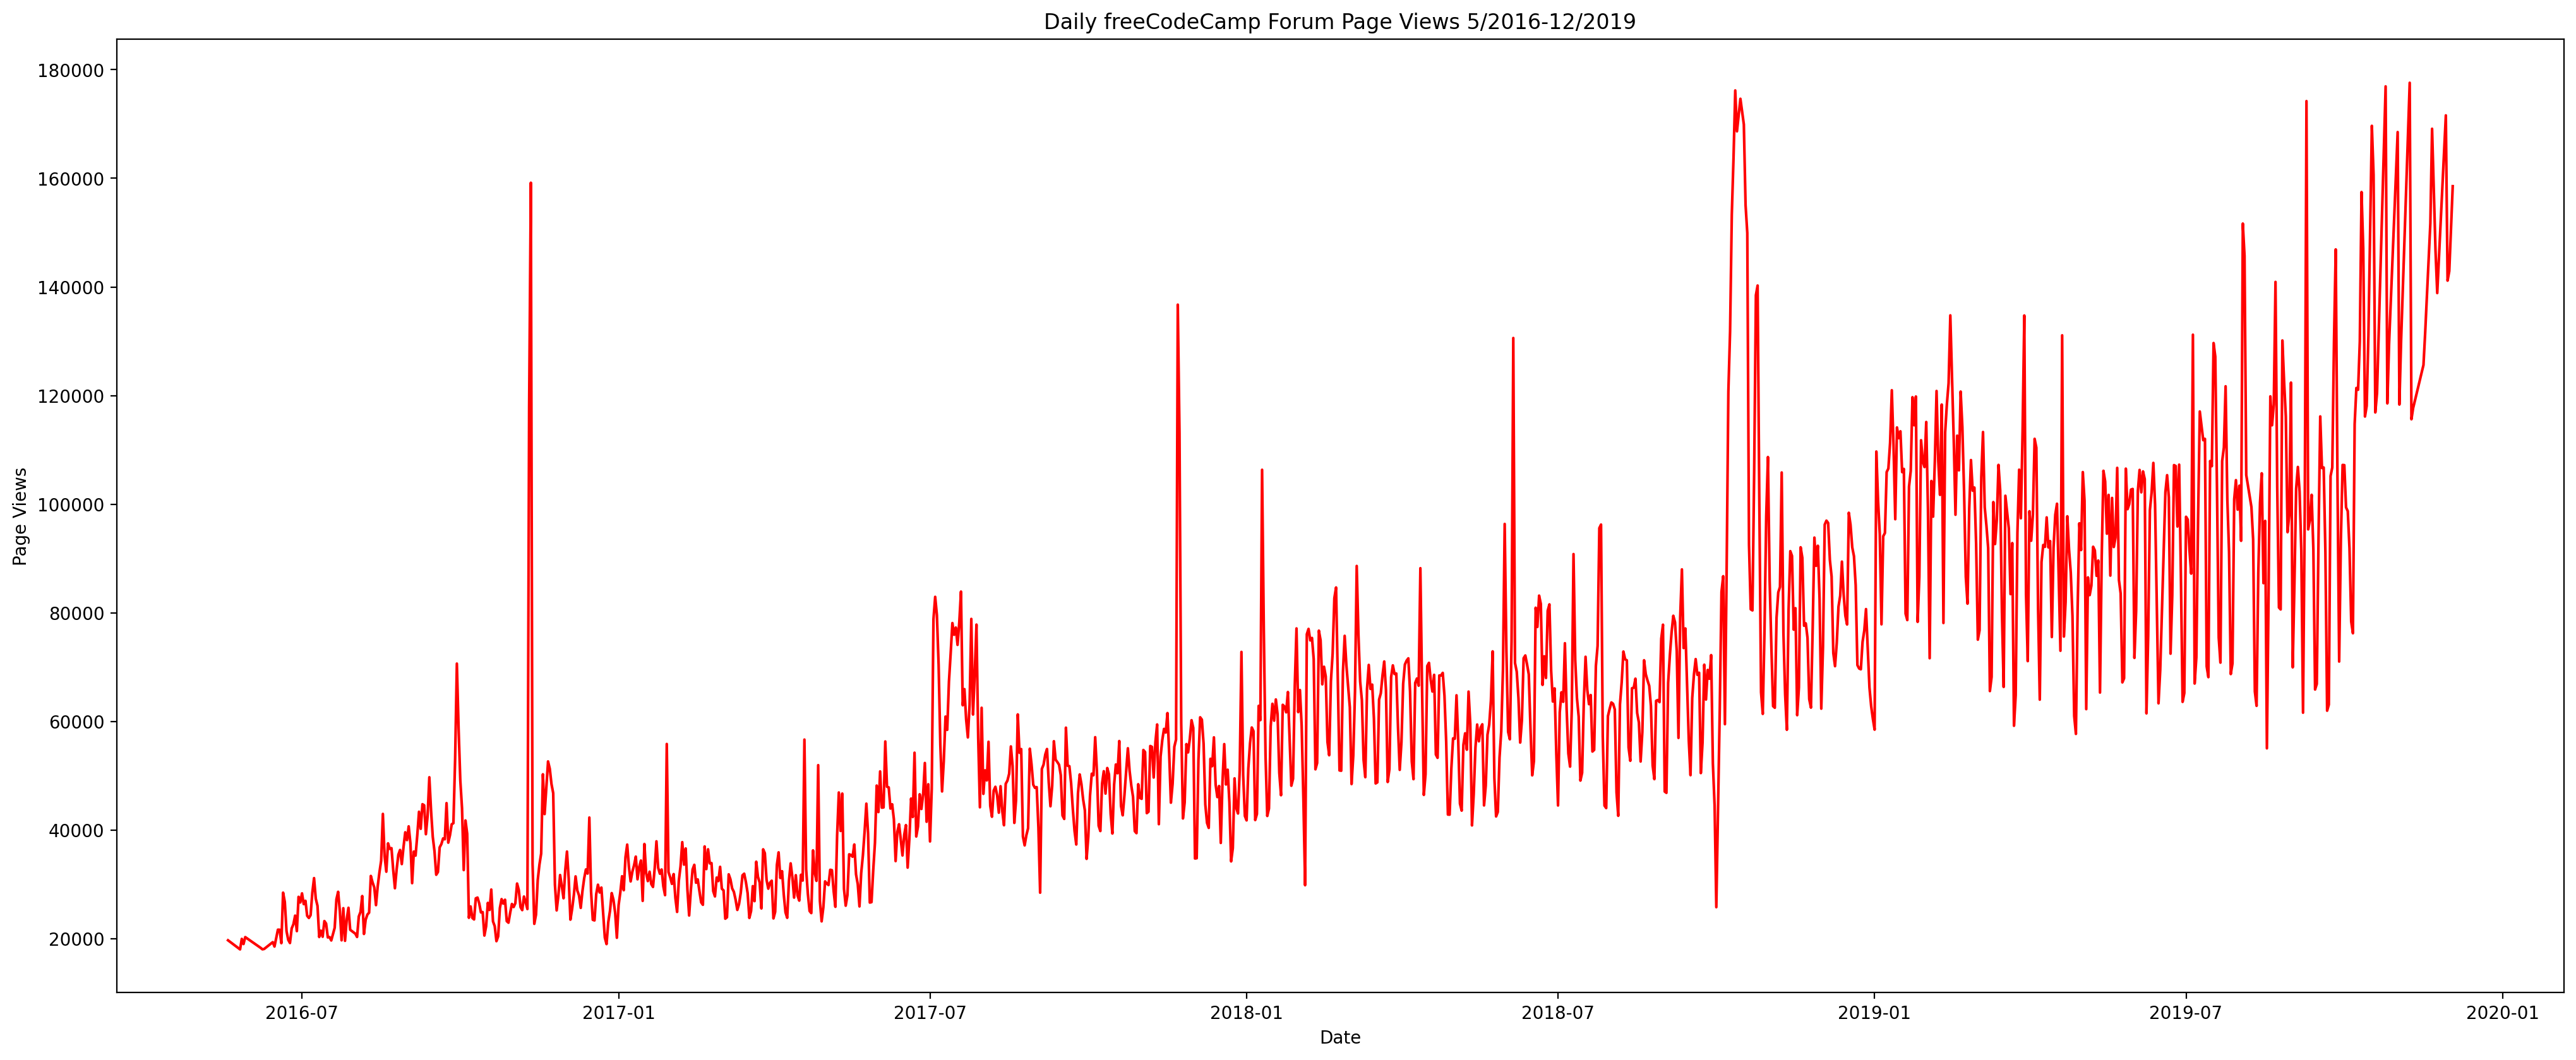

In [133]:
def draw_line_plot():
    fig, ax = plt.subplots(figsize = (25, 10), dpi = 200)
    ax.plot(df, linestyle = 'solid', color = 'r', )
    ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    ax.set_ylabel('Page Views')
    ax.set_xlabel('Date')
    return fig
print(draw_line_plot())


Copy and modify data for monthly bar plot

Draw bar plot

Save image and return fig (don't change this part)

Figure(1400x1400)


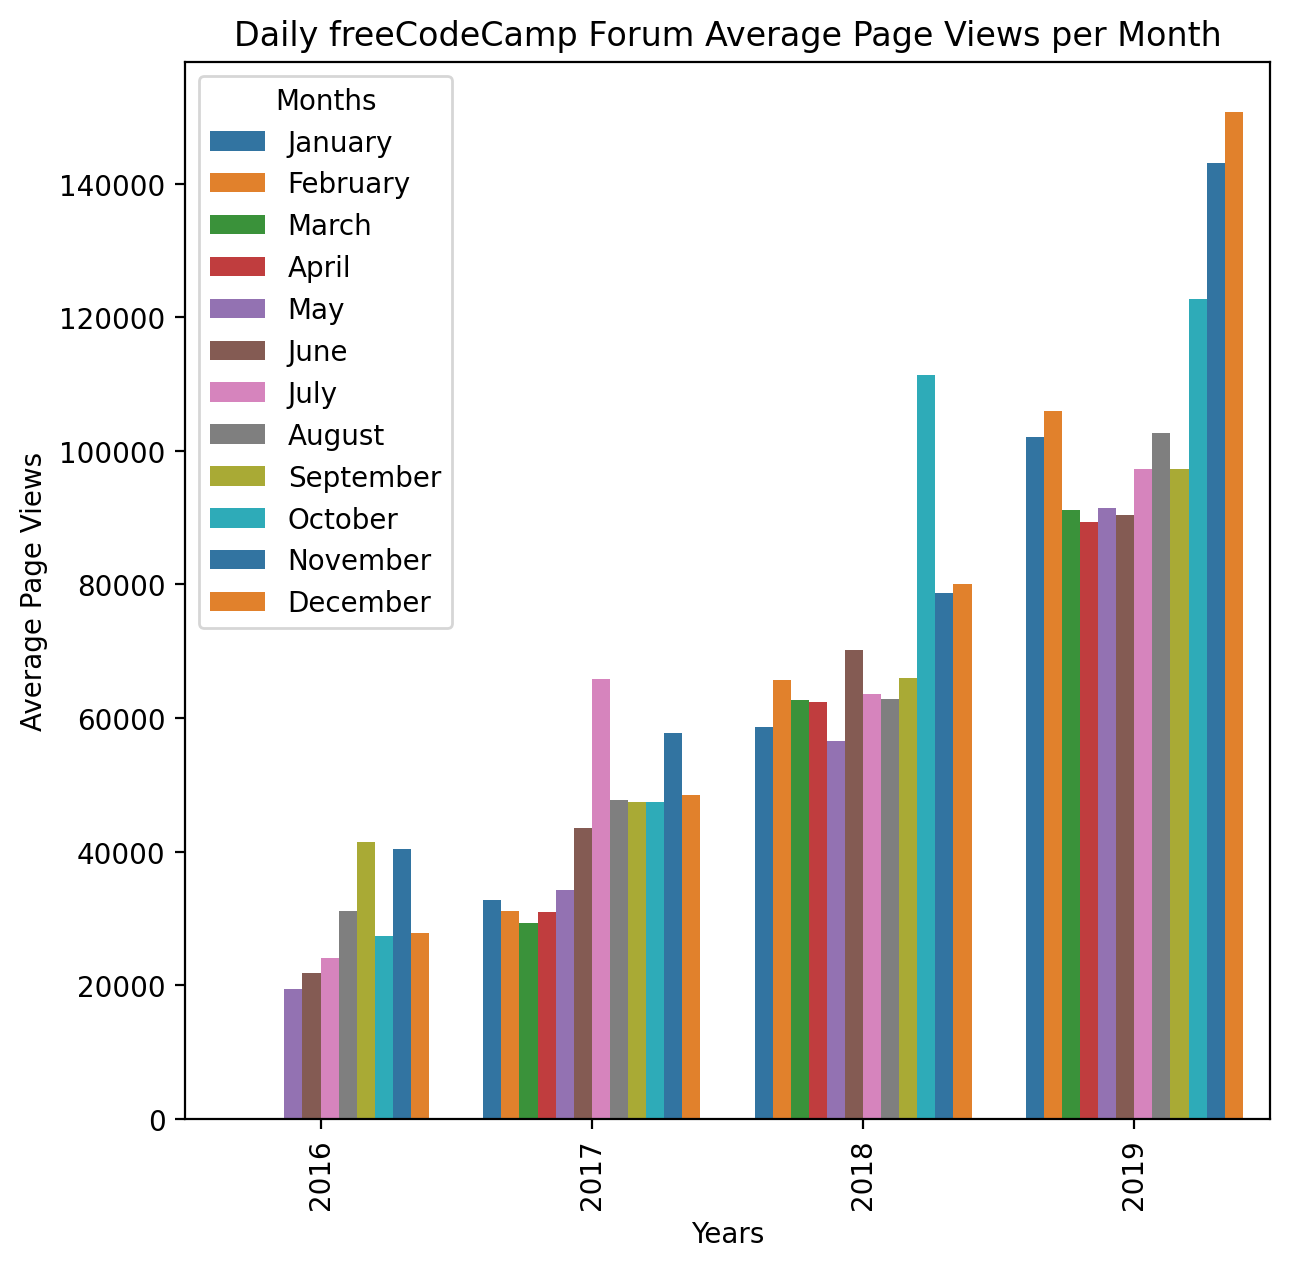

In [132]:
def draw_bar_plot():
    df_bar = df.copy()
    df_bar.reset_index(inplace=True)
    df_bar["Years"] = df_bar['date'].dt.year
    df_bar["Months"] = df_bar['date'].dt.month_name()
    df_bar = df_bar.groupby(['Years', 'Months'], sort = False)['value'].mean().reset_index()
    df_bar = df_bar.rename(columns={"value": "Average Page Views"})
    missing_months = {
        "Years": [2016, 2016, 2016, 2016],
        "Months": ['January', 'February', 'March', 'April'],
        "Average Page Views": [0, 0, 0, 0]
    }
    df_bar = pd.concat([pd.DataFrame(missing_months), df_bar])

    fig, ax = plt.subplots(figsize = (7, 7), dpi = 200)
    sns.barplot(data = df_bar, y = 'Average Page Views', x = 'Years', hue = 'Months', ax = ax, palette = "tab10")
    ax.set_title("Daily freeCodeCamp Forum Average Page Views per Month")
    ax.set_xticklabels(ax.get_xticklabels(), rotation= 90, horizontalalignment = 'center')
    
    return fig
print(draw_bar_plot())

Prepare data for box plots (this part is done!)

Draw box plots (using Seaborn)

Save image and return fig (don't change this part)

Figure(4000x1600)


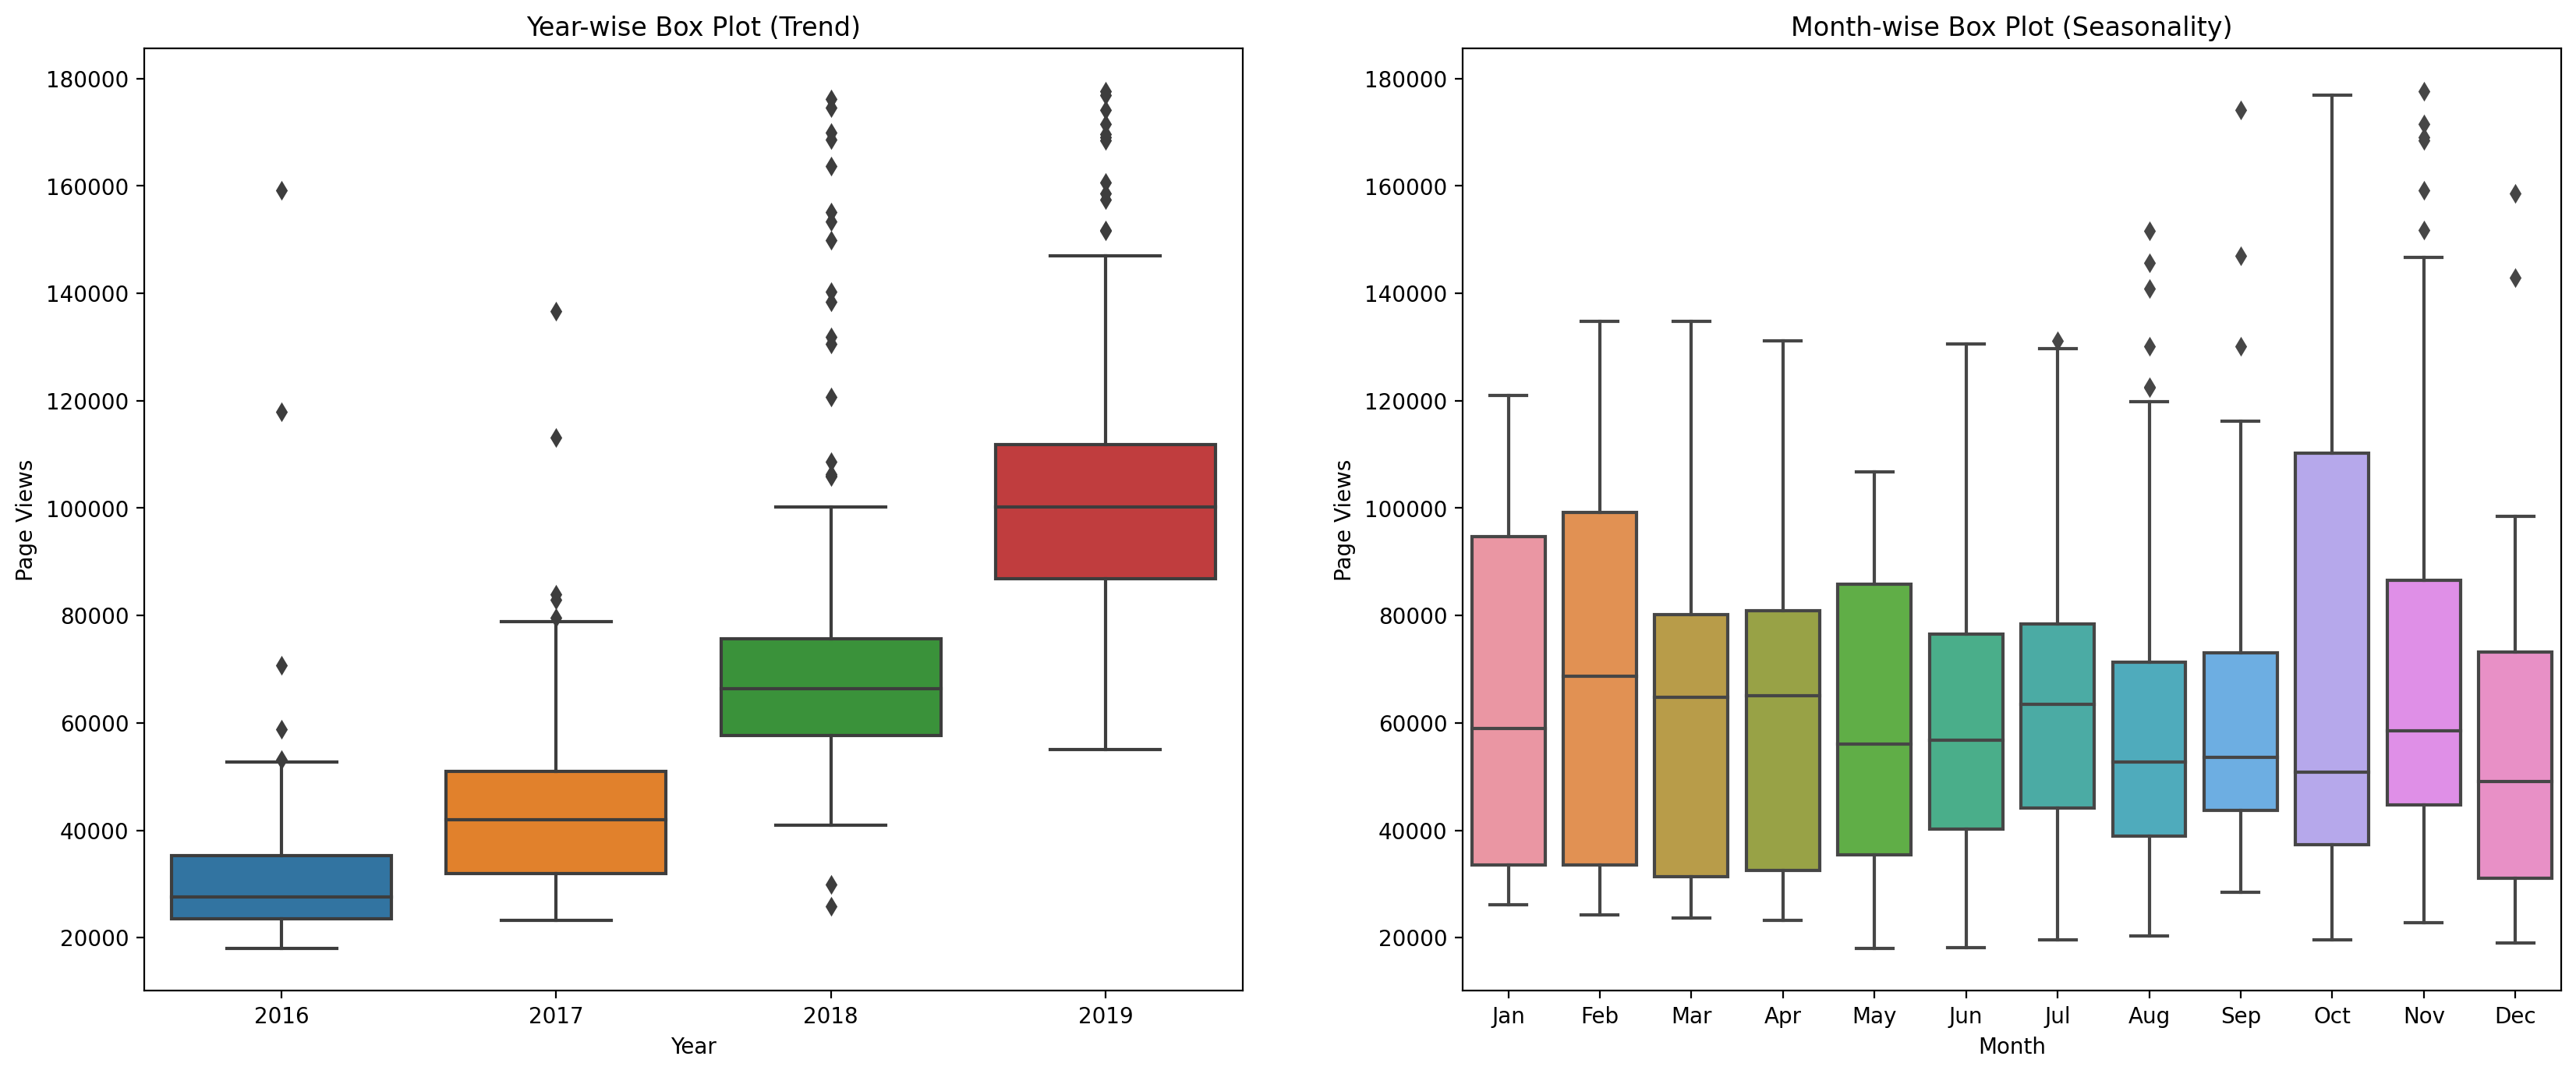

In [131]:
def draw_box_plot():
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['Year'] = [d.year for d in df_box.date]
    df_box['Month'] = [d.strftime('%b') for d in df_box.date]
    df_box = df_box.rename(columns={"value": "Page Views"})
    order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (20, 8), dpi = 200)

    sns.boxplot(x = 'Year', y = 'Page Views', data = df_box, ax = ax1)
    ax1.set_title("Year-wise Box Plot (Trend)")

    sns.boxplot(x = 'Month', y = 'Page Views', data = df_box, ax = ax2, order = order)
    ax2.set_title("Month-wise Box Plot (Seasonality)")

    return fig
print(draw_box_plot())